In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read the country reference file
df_countries = pd.read_csv("CT_COUNTRIES.csv", sep=";", header=None, names=["code", "lang", "name"])

country_dict = df_countries.set_index("code")["name"].to_dict()

In [5]:
import io

FILE_PATH     = "EXPORT_DATA_envoi_01_01_2022_30_04_2025.csv"
TARGET_BYTES  = 1 * 1024**3          # ≈1 GB
ENCODING      = "utf-8-sig"          # handles UTF-8 + BOM

def load_gb_chunk(path, chunk_index=0, target_bytes=TARGET_BYTES, **read_kwargs):
    """
    Load the N-th ≈1 GB chunk (0-based) from a large CSV.

    Parameters
    ----------
    path : str
        CSV file path.
    chunk_index : int
        0 for the first gigabyte, 1 for the second, and so on.
    target_bytes : int
        Approximate raw size for each chunk (defaults to 1 GB).

    Returns
    -------
    pandas.DataFrame
        The requested slice as a DataFrame.
    """
    with open(path, "rb") as f:
        header = f.readline()            # capture header once

        # -------- skip over the earlier chunks --------
        for _ in range(chunk_index):
            skipped = 0
            while skipped < target_bytes:
                line = f.readline()
                if not line:             # hit EOF too soon
                    raise ValueError("chunk_index beyond end of file")
                skipped += len(line)

        # -------- collect the requested chunk --------
        buffers      = [header]
        bytes_so_far = len(header)

        while bytes_so_far < target_bytes:
            line = f.readline()
            if not line:                 # EOF
                break
            bytes_so_far += len(line)
            buffers.append(line)

    pseudo_file = io.BytesIO(b"".join(buffers))

    df = pd.read_csv(
        pseudo_file,
        sep=";",
        encoding=ENCODING,
        on_bad_lines="skip",
        dtype=str,
        low_memory=False,
        **read_kwargs,
    )

    # strip any stray BOM from the first column name
    df.columns = df.columns.str.lstrip("\ufeff")
    return df

# -------- examples --------
df = load_gb_chunk(FILE_PATH, chunk_index=3)  # second GB

print("Fourth:", df.shape)


Fourth: (7905132, 7)


In [6]:
first_row_df = df.head(1)   # first_row_df.shape == (1, df.shape[1])
first_row_df

,RECPTCL_FID,MAILITM_FID,EVENT_TYPE_NM,date,établissement_postal,EVENT_TYPE_CD,next_établissement_postal
0,DEFRAADZALGBBCN40020006000198,CY581782842DE,Expédier envoi à adresse nationale (Srt),2024-01-23 10:30:10.733,ORAN COLIS POSTAUX,2,CDD AIN SEFRA


In [7]:
last_row_df  = df.tail(1)   # last_row_df.shape  == (1, df.shape[1])
last_row_df

,RECPTCL_FID,MAILITM_FID,EVENT_TYPE_NM,date,établissement_postal,EVENT_TYPE_CD,next_établissement_postal
7905131,SGSINBDZALGDAUR30443003010126,RB268533578SG,Expédier envoi à adresse nationale (Ent),2023-04-15 13:29:31.570,ALGER COLIS POSTAUX,35,ALGER GARE


In [8]:
distinct_values_count = df.nunique()

distinct_values_count = distinct_values_count.sort_values(ascending=True)

print(distinct_values_count)

EVENT_TYPE_NM                     23
EVENT_TYPE_CD                     23
next_établissement_postal       3611
établissement_postal            3698
RECPTCL_FID                    76296
MAILITM_FID                  1528238
date                         7764601
dtype: int64


In [11]:
print("the number of not missing bags is", 10103605 - 6909038)

the number of not missing bags is 3194567


In [9]:
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print(missing_columns)

next_établissement_postal    5113938
dtype: int64


In [10]:

# Assuming 'df' is your DataFrame!

# Identify the rows with missing values
missing_rows = df[df.isnull().any(axis=1)]

# Print the total number of rows that have missing values
print("Total rows with missing values:", missing_rows.shape[0])




Total rows with missing values: 5113938


In [11]:
# Analyze the missing patterns across rows:
# Create a binary pattern for each row where 1 indicates a missing value and 0 indicates non-missing.
missing_pattern = missing_rows.isnull().astype(int)
# Convert each pattern to a tuple to use as a key for groupby
missing_pattern_tuples = missing_pattern.apply(tuple, axis=1)
# Group by the missing pattern and count the number of rows for each pattern
pattern_summary = missing_rows.groupby(missing_pattern_tuples).size().sort_values(ascending=False)

print("\nSummary of missing patterns (tuple of 0's and 1's corresponding to missing values in each column):")
print(pattern_summary)




Summary of missing patterns (tuple of 0's and 1's corresponding to missing values in each column):
(0, 0, 0, 0, 0, 0, 1)    5113938
dtype: int64


In [13]:
unique_vals = df['next_établissement_postal'].dropna().unique()
for v in unique_vals:
    print(repr(v))

'CDD AIN SEFRA'
'AVION CPX ALGER'
'ORAN COLIS POSTAUX'
'SIDI MAAROUF'
'VISITE DOUANE CPX ALGER'
'FER CPX ALGER'
'CDD TIZI-OUZOU'
'CDD EL OUED'
'REGUIBA'
'ANNABA EL MARSA'
'TAMALOUS'
'ALGER GARE'
'CDD ADRAR'
'BATNA EMIR ABDELKADER'
'CDD TIPAZA'
'HADJOUT'
'CDD SOUK AHRAS'
'CONSTANTINE COLIS POSTAUX'
'CDD OUM EL BOUAGHI'
'DELY BRAHIM'
'CTR CHLEF'
'REGHAIA'
'CDD GUELMA'
'ORAN ESSABAH'
'CHERARBA 917 LOGTS'
'CDD TARF'
'CDD BLIDA'
'BOUFARIK CITE DU STADE'
'BIRKHADEM'
'CDD OUARGLA'
'CHIFFA'
'ARRIS'
'BOURKIKA '
'CDD TIARET'
'AHMEUR EL AIN '
'CDD SKIKDA'
'RAMDANE-DJAMEL 1ER NOV,'
'1ER NOVEMBRE'
'JIJEL RP'
'CDD JIJEL'
'CDD SETIF'
'CDD BBA'
'BOUKADIR'
'ANNABA AMIROUCHE'
'AZAZGA CHERIFI-ALI-IBN-AREZKI'
'IGUERSAFENE'
'BLIDA RP'
"SIDI M'HAMED"
'STAOUELI'
'BOUSSAADA'
'BOU-SAADA-HOUARI-BOUMEDIENE'
'CDD BATNA'
'AIN EL BYA'
'ARZEW'
'FRERES FERRAD'
'ROUIBA'
'CDD MILA'
'CDD CHELGHOUM LAID 1 ER NOVEMBRE'
'MOHAMMADIA'
'CHLEF-HAI-BADR'
'BIR-BOUHOUCHE'
'CDD SIDI BELABES'
'EL BIAR'
'DOUERA'
'RAMDANIA'
'SIDI ABD

EVENT_TYPE_NM
Recevoir envoi au bureau de livraison (Ent)                    1920171
Expédier envoi à adresse nationale (Ent)                       1489225
Expédier envoi à adresse nationale (Srt)                       1240597
Recevoir envoi au bureau d'échange (Ent)                        928041
Vaine tentative de livraison d'envoi (Ent)                      779532
Livraison d'envoi (Ent)                                         763841
Transmettre envoi à l'agent de livraison (Ent)                  594149
Insérer envoi dans sac (Srt)                                     65731
Enregistrer détails d'envoi au bureau d'échange (Srt)            49865
Recevoir envoi au bureau d'échange (Srt)                         48784
Expédier envoi à la douane (Ent)                                 14133
Renvoyer envoi de la douane (Ent)                                 7502
Recevoir envoi au lieu (Ent)                                      1207
Mettre à jour envoi (Ent)                                      

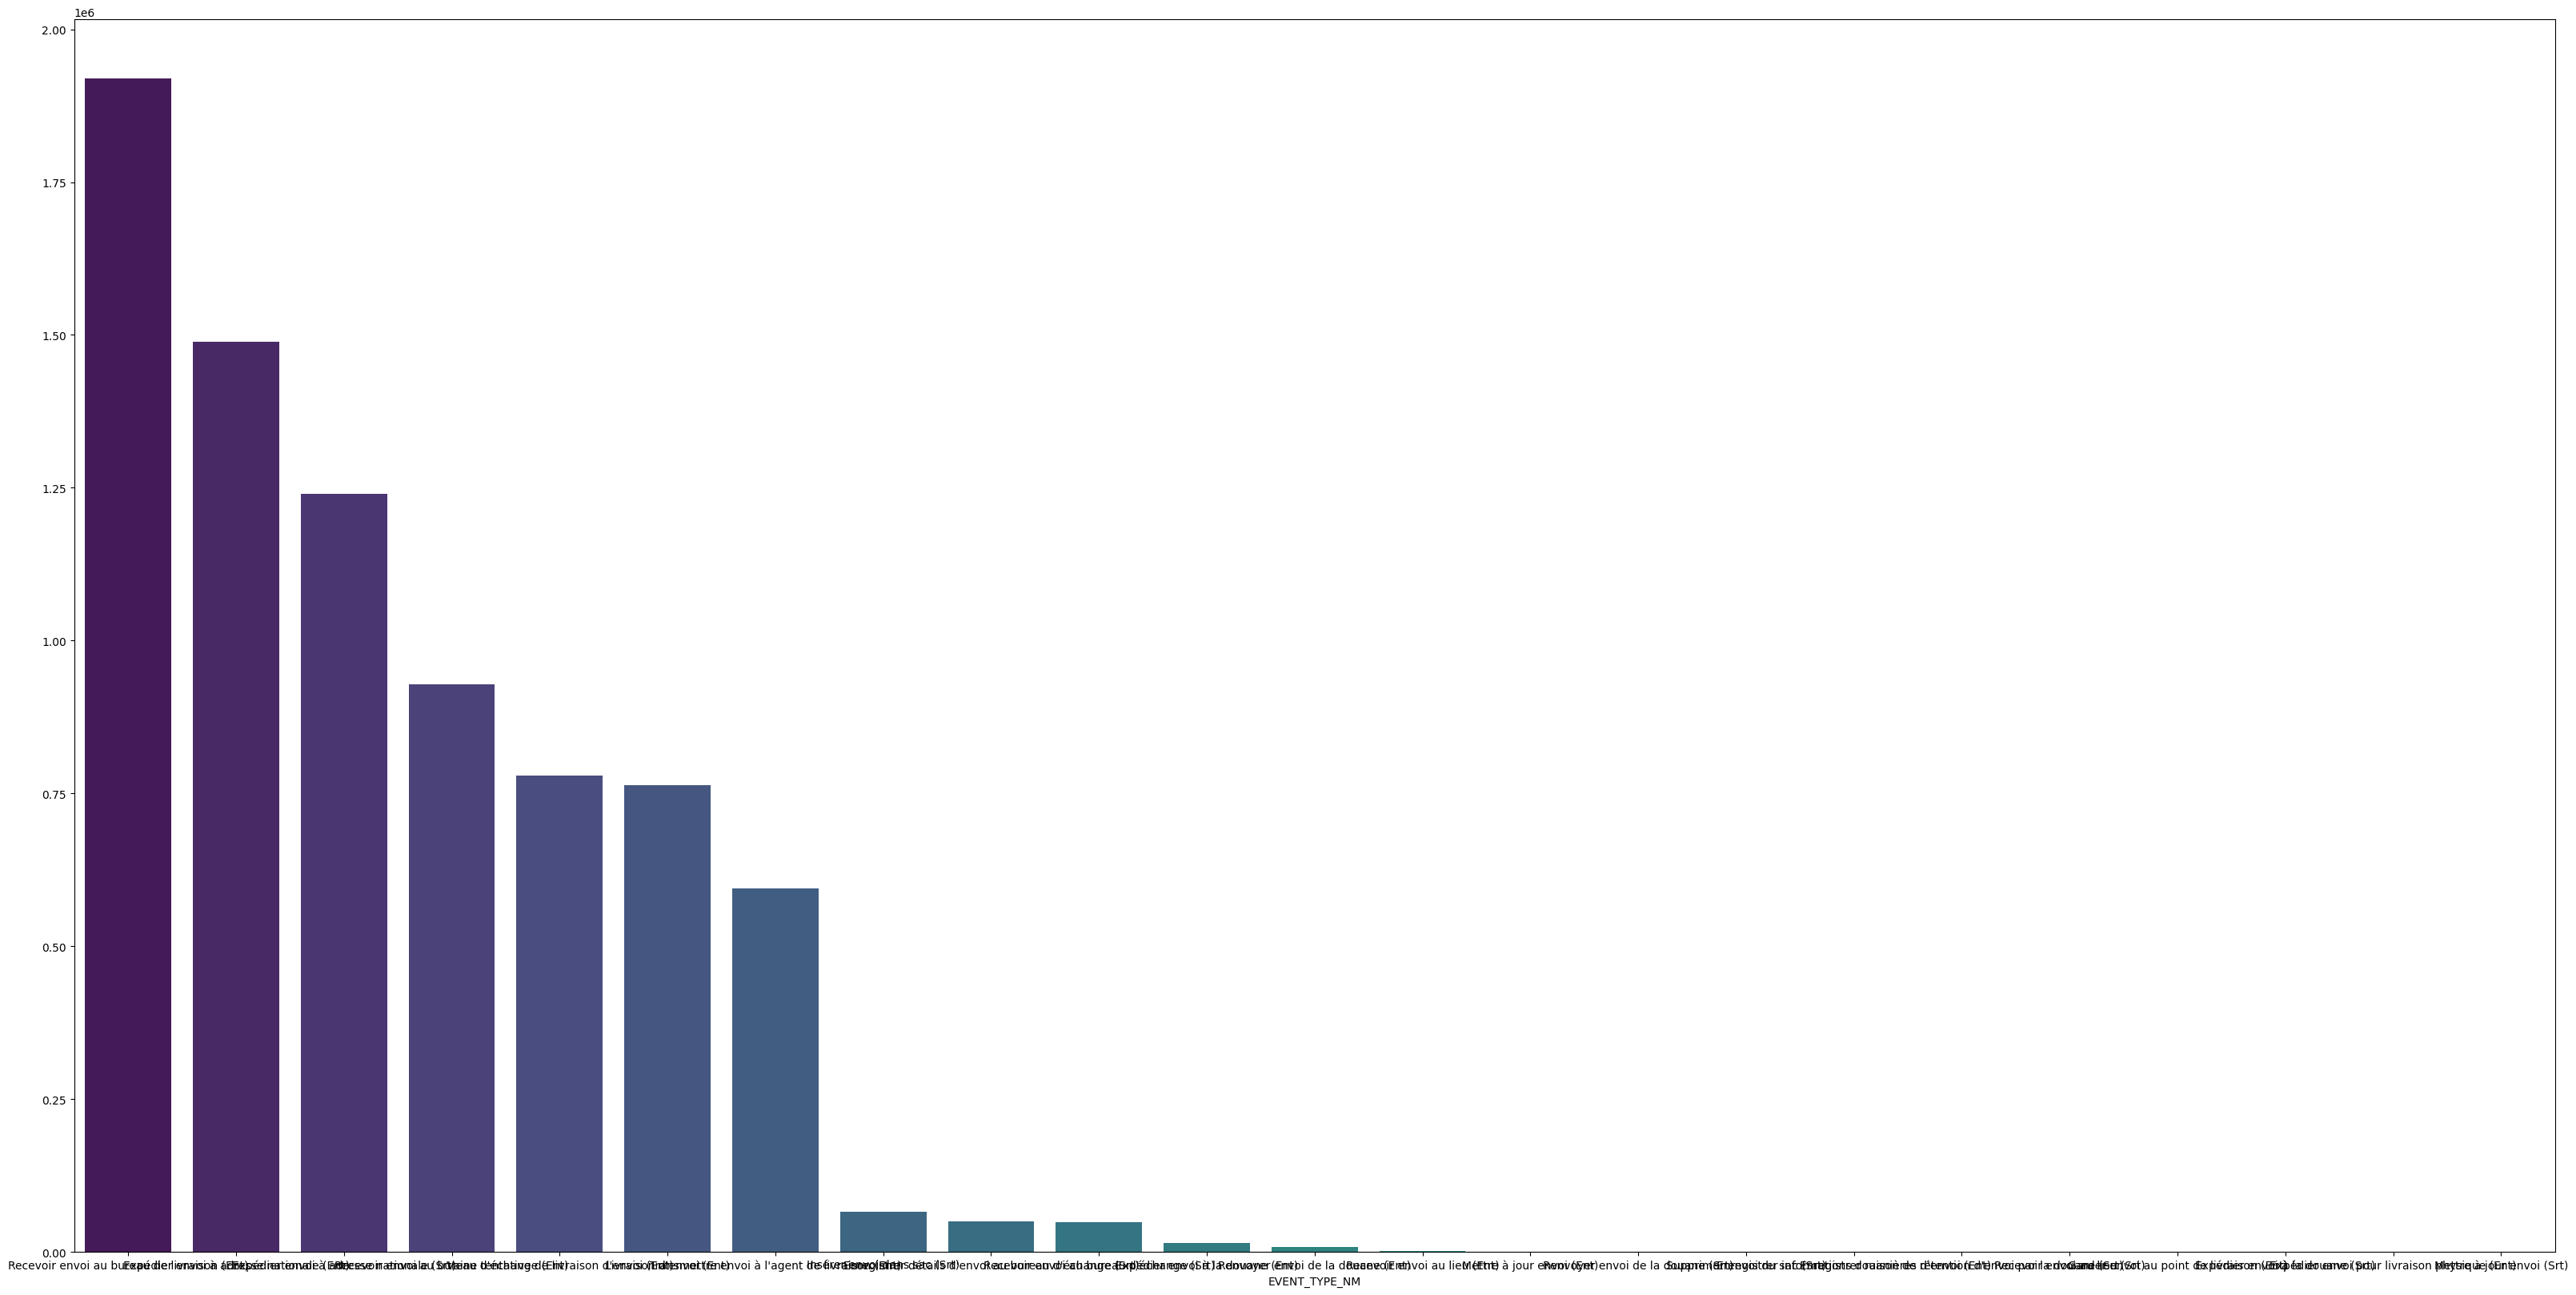

In [14]:

# Count the occurrences of each protocol
event_type = df['EVENT_TYPE_NM'].value_counts()

print(event_type)

# Visualize the counts of each protocol
plt.figure(figsize=(40, 20))
sns.barplot(x=event_type.index, y=event_type.values, palette='viridis')
plt.show()

In [15]:

# Count the occurrences of each protocol
proto_counts = df['établissement_postal'].value_counts()

print(proto_counts)


établissement_postal
ALGER GARE                                 1463423
ALGER COLIS POSTAUX                         989777
CONSTANTINE COLIS POSTAUX                   235719
ANNABA EL MARSA                             205425
CTR CHLEF                                   156224
                                            ...   
IFERI                                            1
MEDEA RESIDENCE UNIVERSITAIRE 2000 LITS          1
EL-MENAZEL                                       1
AIN ARNAT 1 NOV                                  1
THILIDJENE                                       1
Name: count, Length: 3698, dtype: int64


In [16]:
# Count the occurrences of each protocol
proto_counts = df['next_établissement_postal'].value_counts()

print(proto_counts)



next_établissement_postal
ALGER GARE                   329330
SECTION PAQUETS CPX ALGER    224159
ORAN COLIS POSTAUX           117280
CONSTANTINE COLIS POSTAUX    115286
ANNABA EL MARSA               96011
                              ...  
TELEGRAPHIE                       1
FAR ALLAH                         1
OUARGLA RP                        1
OUM EL BOUAGHI GARE               1
BENI MILEUK                       1
Name: count, Length: 3611, dtype: int64


In [10]:
# Rows whose RECPTCL_FID is not NaN
rec_present = df[df["RECPTCL_FID"].notna()]

# Show the first five
rec_present.head()


,RECPTCL_FID,MAILITM_FID,EVENT_TYPE_NM,date,établissement_postal,EVENT_TYPE_CD,next_établissement_postal
6646090,AEDXBADZAAEDACN55029014100196,CP025561236AE,Expédition d'envoi à l'étranger (EDI-reçu),2025-03-21 14:25:00.000,ÉMIRATS ARABES UNIS,12,ALGÉRIE
6646091,AEDXBADZAAEDACN55029014100196,CP025562483AE,Expédition d'envoi à l'étranger (EDI-reçu),2025-03-21 14:25:00.000,ÉMIRATS ARABES UNIS,12,ALGÉRIE
6646092,AEDXBADZAAEDACN55029014100196,CP025571009AE,Expédition d'envoi à l'étranger (EDI-reçu),2025-03-21 14:25:00.000,ÉMIRATS ARABES UNIS,12,ALGÉRIE
6646093,AEDXBADZAAEDACN55029014100196,CP025571295AE,Expédition d'envoi à l'étranger (EDI-reçu),2025-03-21 14:25:00.000,ÉMIRATS ARABES UNIS,12,ALGÉRIE
6646094,AEDXBADZAAEDACN55029014100196,CP025577240AE,Expédition d'envoi à l'étranger (EDI-reçu),2025-03-21 14:25:00.000,ÉMIRATS ARABES UNIS,12,ALGÉRIE


In [17]:
# 1️⃣  Make sure the column is treated as text (protects against NaNs)
fid = df["MAILITM_FID"].astype("string")

# 2️⃣  Boolean mask: True if both trailing characters are letters (A-Z / a-z)
two_letter_suffix = fid.str[-2:].str.isalpha()

# --- Quick sanity check
print(two_letter_suffix.value_counts(dropna=False))
# True  : rows where the code ends in letters (e.g. "ES")
# False : rows where it ends in digits or something else
# <NA>  : rows where MAILITM_FID itself is missing


MAILITM_FID
True    7905132
Name: count, dtype: Int64


In [18]:
bad_suffix = df[~two_letter_suffix & fid.notna()]

print(f"Bad rows: {len(bad_suffix):,}")
bad_suffix.head()   # peek at the first few offenders



Bad rows: 0


,RECPTCL_FID,MAILITM_FID,EVENT_TYPE_NM,date,établissement_postal,EVENT_TYPE_CD,next_établissement_postal


In [13]:
# Build the “good suffix” mask once
suffix_ok = (
    df["MAILITM_FID"]
      .astype("string")
      .str[-2:]
      .str.isalpha()
      .fillna(False)          # treat missing IDs as bad
)

df = df[suffix_ok]

# Quick confirmation
print(f"Rows left: {len(df):,}")
df.head()


Rows left: 10,103,602


,RECPTCL_FID,MAILITM_FID,EVENT_TYPE_NM,date,établissement_postal,EVENT_TYPE_CD,next_établissement_postal
0,NaN,CC021659473ES,Insérer envoi dans sac (Srt),2024-01-31 20:11:00.000,ESPAGNE,8,NaN
1,NaN,CC021662747ES,Réception d'envoi du client (Srt),2024-01-31 12:31:00.000,ESPAGNE,1,NaN
2,NaN,CC021662747ES,Insérer envoi dans sac (Srt),2024-02-05 12:46:00.000,ESPAGNE,8,NaN
3,NaN,CC021663328ES,Réception d'envoi du client (Srt),2024-01-31 13:51:00.000,ESPAGNE,1,NaN
4,NaN,CC021663328ES,Insérer envoi dans sac (Srt),2024-02-01 12:32:00.000,ESPAGNE,8,NaN


In [19]:
df['id'] = df["MAILITM_FID"].str[-2:]
df.head()

,RECPTCL_FID,MAILITM_FID,EVENT_TYPE_NM,date,établissement_postal,EVENT_TYPE_CD,next_établissement_postal,id
0,DEFRAADZALGBBCN40020006000198,CY581782842DE,Expédier envoi à adresse nationale (Srt),2024-01-23 10:30:10.733,ORAN COLIS POSTAUX,2,CDD AIN SEFRA,DE
1,DEFRAADZALGBBCN40020006000198,CY581782842DE,Expédier envoi à adresse nationale (Srt),2024-01-23 10:31:04.630,ORAN COLIS POSTAUX,2,CDD AIN SEFRA,DE
2,DEFRAADZALGBBCN40020006000198,CY581782842DE,Expédier envoi à adresse nationale (Srt),2024-01-23 10:32:11.227,ORAN COLIS POSTAUX,2,CDD AIN SEFRA,DE
3,DEFRAADZALGBBCN40020006000198,CY581782842DE,Expédier envoi à adresse nationale (Srt),2024-01-23 10:36:29.813,ORAN COLIS POSTAUX,2,CDD AIN SEFRA,DE
4,DEFRAADZALGBBCN40020006000198,CY581782842DE,Recevoir envoi au bureau de livraison (Ent),2024-01-24 11:32:16.963,CDD AIN SEFRA,32,NaN,DE


In [20]:

# Count the occurrences of each protocol
proto_counts = df['id'].value_counts()

print(proto_counts)

s = proto_counts


id
CZ    2021896
NL    1745317
FR    1645263
SG    1131469
MY     549490
       ...   
AM          4
BH          4
AW          4
TT          4
DY          3
Name: count, Length: 143, dtype: int64


In [21]:
# Map the Series index using the country_dict
s.index = s.index.map(lambda code: country_dict.get(code, code))  # Keep unmapped codes as-is
print(s)

id
TCHÈQUE, RÉPUBLIQUE    2021896
PAYS-BAS               1745317
FRANCE                 1645263
SINGAPOUR              1131469
MALAISIE                549490
                        ...   
ARMÉNIE                      4
BAHREÏN                      4
ARUBA                        4
TRINITÉ-ET-TOBAGO            4
DY                           3
Name: count, Length: 143, dtype: int64


In [22]:
print("Min date:", df["date"].min())
print("Max date:", df["date"].max())

Min date: 2005-11-08 23:29:54.370
Max date: 2025-05-21 15:57:25.153


In [23]:
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d %H:%M:%S.%f")
# Sort by ID and date
df = df.sort_values(by=["MAILITM_FID", "date"])

# Calculate time to next step
df["duration_to_next_step"] = df.groupby("MAILITM_FID")["date"].shift(-1) - df["date"]

# Calculate total duration per ID
first_date = df.groupby("MAILITM_FID")["date"].transform("first")
last_date = df.groupby("MAILITM_FID")["date"].transform("last")
df["total_duration"] = last_date - first_date

# Preview the updated dataset
df[["MAILITM_FID", "date", "EVENT_TYPE_NM", "duration_to_next_step", "total_duration"]].head(10)


,MAILITM_FID,date,EVENT_TYPE_NM,duration_to_next_step,total_duration
5907899,CA000340856PK,2023-01-24 08:31:40.510,Expédier envoi à adresse nationale (Ent),0 days 00:09:08.413000,5 days 04:20:19.490000
5907900,CA000340856PK,2023-01-24 08:40:48.923,Expédier envoi à adresse nationale (Ent),0 days 00:20:25.824000,5 days 04:20:19.490000
5907904,CA000340856PK,2023-01-24 09:01:14.747,Recevoir envoi au bureau de livraison (Ent),0 days 00:02:36.360000,5 days 04:20:19.490000
5907902,CA000340856PK,2023-01-24 09:03:51.107,Expédier envoi à adresse nationale (Srt),0 days 14:13:19.026000,5 days 04:20:19.490000
5907901,CA000340856PK,2023-01-24 23:17:10.133,Expédier envoi à adresse nationale (Ent),1 days 08:38:25.084000,5 days 04:20:19.490000
5907905,CA000340856PK,2023-01-26 07:55:35.217,Transmettre envoi à l'agent de livraison (Ent),3 days 04:56:24.783000,5 days 04:20:19.490000
5907903,CA000340856PK,2023-01-29 12:52:00.000,Livraison d'envoi (Ent),NaT,5 days 04:20:19.490000
5956511,CA000623155BF,2024-04-01 11:34:56.370,Vaine tentative de livraison d'envoi (Ent),NaT,0 days 00:00:00
5953691,CA000644495PT,2022-01-25 09:05:31.010,Recevoir envoi au bureau d'échange (Ent),0 days 00:09:43.123000,8 days 05:15:17.217000
5953647,CA000644495PT,2022-01-25 09:15:14.133,Expédier envoi à adresse nationale (Ent),0 days 00:09:30.990000,8 days 05:15:17.217000


In [24]:
df.to_csv("df_with_durations_04.csv", index=False, encoding='utf-8-sig')

In [ ]:
print("no zero duration", 10103602 - 1712240)

no zervo duration 8391362


In [25]:
# Filter rows where total_duration is NOT zero
zero_duration_df = df[df["total_duration"] == pd.Timedelta(0)]

# Display the first few rows as a check
zero_duration_df.shape


(47111, 10)

In [26]:

# Count the occurrences of each protocol
countries = zero_duration_df['id'].value_counts()

print(countries)


id
CZ    18677
NL    12769
SG     8516
MY     5168
DE     1127
PL      218
FR       88
SA       85
PT       81
SE       78
LV       32
IN       30
NO       29
AU       25
GB       20
IL       20
PK       17
BR       17
ES       14
QA       13
IE        9
SI        8
LU        7
GQ        7
UZ        7
MA        6
SK        5
IT        4
VU        4
HK        3
NZ        3
PE        3
RU        2
JE        2
FI        2
EE        2
CN        1
JO        1
AL        1
IQ        1
BF        1
MU        1
OM        1
AO        1
CY        1
HR        1
UY        1
PS        1
DK        1
Name: count, dtype: int64


In [27]:
# Map the Series index using the country_dict
countries.index = countries.index.map(lambda code: country_dict.get(code, code))  
print(countries)

id
TCHÈQUE, RÉPUBLIQUE               18677
PAYS-BAS                          12769
SINGAPOUR                          8516
MALAISIE                           5168
ALLEMAGNE                          1127
POLOGNE                             218
FRANCE                               88
ARABIE SAOUDITE                      85
PORTUGAL                             81
SUÈDE                                78
LETTONIE                             32
INDE                                 30
NORVÈGE                              29
AUSTRALIE                            25
ROYAUME-UNI                          20
ISRAËL                               20
PAKISTAN                             17
BRÉSIL                               17
ESPAGNE                              14
QATAR                                13
IRLANDE                               9
SLOVÉNIE                              8
LUXEMBOURG                            7
GUINÉE ÉQUATORIALE                    7
OUZBÉKISTAN                          

In [28]:
# Step 1: Count how many times each ID appears
id_counts = zero_duration_df["MAILITM_FID"].value_counts()

# Step 2: Count how many IDs have a specific count
count_of_counts = id_counts.value_counts().sort_index()

print(count_of_counts)


count
1    47111
Name: count, dtype: int64


In [29]:
ids_with_0 = id_counts[id_counts == 1].index
df_with_0 = df[df["MAILITM_FID"].isin(ids_with_0)]
df_with_0.head(20)

,RECPTCL_FID,MAILITM_FID,EVENT_TYPE_NM,date,établissement_postal,EVENT_TYPE_CD,next_établissement_postal,id,duration_to_next_step,total_duration
5956511,RUMOWVDZALGBACN40002001110091,CA000623155BF,Vaine tentative de livraison d'envoi (Ent),2024-04-01 11:34:56.370,DRARIA,36,NaN,BF,NaT,0 days
5953891,PTLISHDZALGBACN27015001100137,CA000831533PT,Expédier envoi à adresse nationale (Ent),2022-05-05 09:35:06.667,ALGER COLIS POSTAUX,35,FER CPX ALGER,PT,NaT,0 days
5954345,PTLISHDZALGBACN27038002100051,CA001287319PT,Recevoir envoi au bureau de livraison (Ent),2023-01-04 13:07:42.067,EMS ALGER CPX,32,EMS ALGER CPX,PT,NaT,0 days
5954438,PTLISHDZALGBACN37014001100026,CA001516643PT,Expédier envoi à adresse nationale (Ent),2023-05-16 08:57:54.497,ALGER COLIS POSTAUX,35,HUSSEIN DEY RP,PT,NaT,0 days
5954755,PTLISHDZALGBACN47034001100110,CA002332028PT,Recevoir envoi au bureau de livraison (Ent),2024-10-27 12:37:37.527,CDD SETIF,32,NaN,PT,NaT,0 days
5954769,PTLISHDZALGBACN47040001100044,CA002370193PT,Expédier envoi à adresse nationale (Srt),2024-11-17 10:36:20.030,CTR CHLEF,2,CHLEF-LALLA-AOUDA,PT,NaT,0 days
5955107,PTLISHDZALGBACN57022001100077,CA002607408PT,Vaine tentative de livraison d'envoi (Ent),2025-05-06 08:37:03.163,DIAR EL DJEMMAA,36,NaN,PT,NaT,0 days
23973,DEFRAADZALGBBCN40531001100026,CA181051966DE,Recevoir envoi au bureau d'échange (Ent),2024-08-12 08:48:50.483,ALGER COLIS POSTAUX,30,NaN,DE,NaT,0 days
5107588,DEFRAADZALGBBCN30441002000080,CA198010373DE,Recevoir envoi au bureau d'échange (Ent),2023-05-24 10:00:33.453,ALGER COLIS POSTAUX,30,NaN,DE,NaT,0 days
5054622,DEFRAADZALGBBCN20533006000097,CA284345658DE,Recevoir envoi au bureau d'échange (Ent),2022-08-20 09:32:22.307,ALGER COLIS POSTAUX,30,NaN,DE,NaT,0 days


In [30]:

# Count the occurrences of each protocol
event_type = df_with_0['EVENT_TYPE_NM'].value_counts()

print(event_type)



EVENT_TYPE_NM
Expédier envoi à adresse nationale (Ent)                       10691
Recevoir envoi au bureau de livraison (Ent)                     8971
Recevoir envoi au bureau d'échange (Ent)                        8718
Expédier envoi à adresse nationale (Srt)                        5689
Livraison d'envoi (Ent)                                         5251
Vaine tentative de livraison d'envoi (Ent)                      3139
Transmettre envoi à l'agent de livraison (Ent)                  2059
Expédier envoi à la douane (Ent)                                1652
Insérer envoi dans sac (Srt)                                     410
Recevoir envoi au bureau d'échange (Srt)                         222
Renvoyer envoi de la douane (Ent)                                156
Enregistrer détails d'envoi au bureau d'échange (Srt)            140
Mettre à jour envoi (Ent)                                          5
Recevoir envoi au lieu (Ent)                                       4
Enregistrer raison d